In [1]:
import pandas as pd

#reading the dataset
df = pd.read_csv("dataset_0HB-1AI.csv")
df.head()

,Unnamed: 0,sentence,class
0,0,NLP is a multidisciplinary field that draws fr...,0
1,1,"In terms of linguistics, a program must be abl...",0
2,2,Of course each language has its own forms of a...,0
3,3,Programs can use several strategies for dealin...,0
4,4,As formidable as the task of extracting the co...,0


In [2]:
# The class column represents the classification of the text in our dataset as Human (0) of AI (1)

df.shape

(7344, 3)

In [3]:
# To check for class imbalance

df['class'].value_counts()

class
1    4008
0    3336
Name: count, dtype: int64

In [4]:
df['label'] = df['class'].map({0 : "Human", 1 : "AI"})

In [5]:
df.head()

,Unnamed: 0,sentence,class,label
0,0,NLP is a multidisciplinary field that draws fr...,0,Human
1,1,"In terms of linguistics, a program must be abl...",0,Human
2,2,Of course each language has its own forms of a...,0,Human
3,3,Programs can use several strategies for dealin...,0,Human
4,4,As formidable as the task of extracting the co...,0,Human


In [6]:
# Converting sentence (text column) in to word vectors
import spacy
nlp = spacy.load("en_core_web_lg")

In [7]:
df['vector'] = df['sentence'].apply(lambda x: nlp(x).vector)

In [8]:
df.head()

,Unnamed: 0,sentence,class,label,vector
0,0,NLP is a multidisciplinary field that draws fr...,0,Human,"[-1.5092337, -0.1936465, -0.3881989, -0.545883..."
1,1,"In terms of linguistics, a program must be abl...",0,Human,"[-1.6096503, 1.0357584, -0.44561067, -0.111713..."
2,2,Of course each language has its own forms of a...,0,Human,"[-2.0689058, -0.6548883, -1.2195809, 0.2336663..."
3,3,Programs can use several strategies for dealin...,0,Human,"[-2.2618732, 0.47811788, -1.0672407, 0.8176014..."
4,4,As formidable as the task of extracting the co...,0,Human,"[-2.0082736, -0.81104, 0.058229446, 0.29187, 4..."


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df['class'],
    test_size = 0.2,
    random_state = 2022
)

In [10]:
#we need to convert to 2d array
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. 
#The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, 
#we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data.


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [12]:
y_pred = clf.predict(scaled_test_embed)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.45      0.57       658
           1       0.67      0.88      0.76       811

    accuracy                           0.69      1469
   macro avg       0.71      0.67      0.66      1469
weighted avg       0.71      0.69      0.67      1469



Text(95.72222222222221, 0.5, 'Truth')

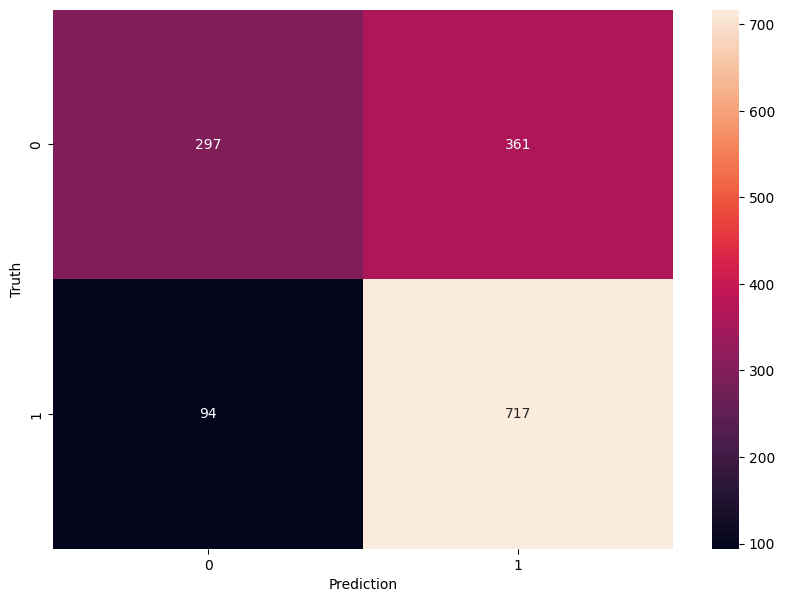

In [13]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [14]:
# KNN Classifier
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred_knn = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       658
           1       0.77      0.80      0.79       811

    accuracy                           0.76      1469
   macro avg       0.76      0.76      0.76      1469
weighted avg       0.76      0.76      0.76      1469



In [15]:
# We got better accuracy using KNN-CLassifier

# It performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings
#(similar and related words have almost similar embeddings) for the given text data.

Text(95.72222222222221, 0.5, 'Truth')

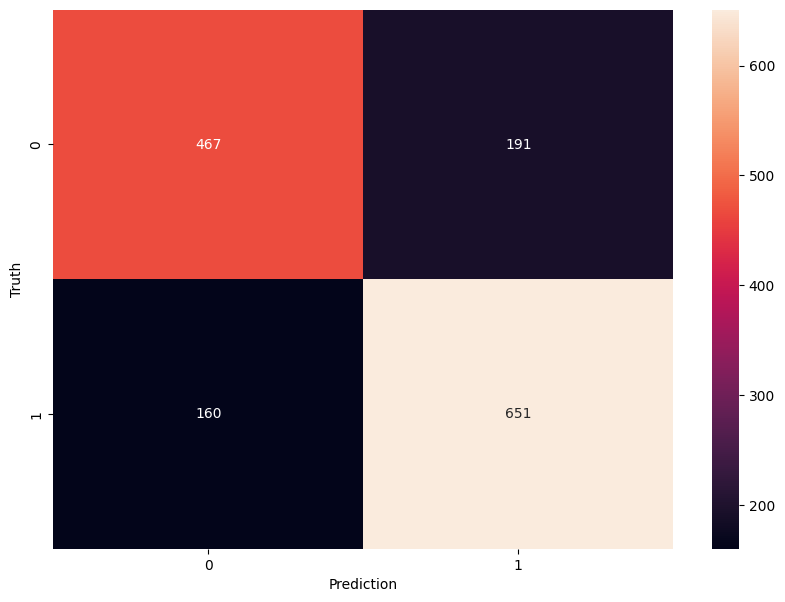

In [16]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')